## Introduction

For my final project, I will be using data from the bachelor/bachelorette seasons to see if theres any specific patterns between the contestants who make it to the finale and win the seasons. I think this will be interesting to look into because every season people love to make guesses on who they think is gonna win based on many different reasons. My goal of this project is to see if there actually is factors that can predict who is gonna win the season, and if so what are the trends that the most winners fall into. 

## Background
Many people are obsessed with predicting the winners of the bachelor franchise and some people have even tried to find correlations between the contestants of all 30+ seasons. We know that there are "characters" people play in an attempt to make it farther such as "the villian", "the girl next door", and "fan-favorite", but is there characteristsics about the contestants that are actually getting them far. Peoples Magazine and fivethirtyeight analyzed data from the bachelor and had noticed some trends between the contestants. Some of their findings for this research had been that the most contestants were aged 25, most of the contestants lived in, Chicago, and 35% of recipents of the first impression rose made it to the finale episode. 

These findings inform my decisions to perform this study because it seems like there could be some type of correlation between the contestants from every season. But these studies only looked at average ages of the contestants, but didn't compare them to the respective lead of that season which means they didn't have any findings related to winning and the age gaps of contestants and leads. Instead of just looking at the average age of the winners, I want to go further and look to see if the age gap between winning contestants and the lead matter. 

The wesbites which posted this research can be found here: 
https://people.com/tv/bachelor-stats-age-name-occupation/
https://fivethirtyeight.com/features/the-bachelorette/ 

## Research Question and Hypotheses

For this project my research question is:

Does the age gap between contestants and the lead contribute to contestants making it to the finale/winning the season?

I think the age gaps between contestants and leads will have an impact on who is making it to the finale. I think the contestants who are closer in age to the lead will make it to the finale and possibly win
- Contestants with an age gap closer to the lead (5 or less years) are more likely to get into the finale of the show

## Methodology
I created my own dataset of the names, ages, and hometowns of the bachelors/bachelorettes and the winners + runner ups of their season as well. My data came from both Bachelor Nation Fandom which is a wikipedia page for fandoms. 

For the bachelor, I took out the seasons 6, 8, and 11 of the bachelor. I did this because seasons 6 and 8 had incomplete data on those Bachelor Nation Fandom and I thought keeping potentially incorrect data would harm my study. I took out season 11 because there was no winner in that season making it irrevelant to my project.

For the bachelorette, I removed data from season 16 because the first bachelorette picked someone in the first couple weeks and then got replaced so her data is removed due to her not having a complete season.

Below, I will be finding out the age gaps between the lead and the winner as well as the lead and runner up and then use that to find total counts of every age gap. I calcuated the counts of age gaps into two categories: "five years or less" and "more than 5 years" as that is what I would classify as a small age gap. I then created visual graphs to looks for patterns in the data and discuss them below.

## Data Analysis

### Step 1: Import Dataset

To start off, I will be importing my dataset from Google Sheets and turning it into a list of dictionaries

In [56]:
#import the csv module
import csv

In [57]:
def prepare_datasets(file_path):
    """ 
    Accepts: path to a tab-separated plaintext file
    Returns: a list containing a dictionary for every row in the file, 
        with the file column headers as keys
    """
    
    with open(file_path) as infile:
        reader = csv.DictReader(infile, delimiter='\t')
        list_of_dicts = [dict(r) for r in reader]
        
    return list_of_dicts

In [58]:
bachelor_data = prepare_datasets("the_bachelor_dataset.tsv")
print(bachelor_data[0])

{'Season': '1', 'Bachelor': 'Alex Michel', 'B_Age': '31', 'B_Hometown': 'Charlottesville, Virginia.', 'Winner': 'Amanda Marsh', 'W_Age': '23', 'W_Hometown': 'Chanute, Kansas', 'Runner-up': 'Trista Rehn', 'R_Age': '29', 'R_Hometown': 'St. Louis, Missouri'}


### Step 2: Add Person and their age to a list 

Now that we have our datasets loaded, we are going to loop through every season and get the ages of the lead bachelor, the winner, and the runner up. I am going to create three seperate arrays, one for the lead, the winner, the runner up of every season

In [59]:
# the empty list
bach_Age = []

# creates a dictionary for every bachelor
for bachelor in bachelor_data:
    # format for each dictionary
    bachelor_info = {"Bachelor": bachelor["Bachelor"], "Age": int(bachelor["B_Age"])}
    bach_Age.append(bachelor_info)
# The age + name of just the first bachelor
print(bach_Age[0])

{'Bachelor': 'Alex Michel', 'Age': 31}


In [60]:
# the list for the bacehlor winners
winner_Age = []

# creates a dictionary for every winner
for winner in bachelor_data:
    #The format for each dictionary 
    winner_info = {"Winner": winner["Winner"], "Age": int(winner["W_Age"])}
    winner_Age.append(winner_info)
print(winner_Age[0])

{'Winner': 'Amanda Marsh', 'Age': 23}


In [61]:
# the list for the bachelor runner ups
runnerUp_Age = []

# creates a dictionary for every Runner up
for runnerUp in bachelor_data:
    runnerUp_info = {"Runner-Up": runnerUp["Runner-up"], "Age": int(runnerUp["R_Age"])}
    runnerUp_Age.append(runnerUp_info)
print(runnerUp_Age[0])

{'Runner-Up': 'Trista Rehn', 'Age': 29}


### Step 3: Find Age gaps between leads and Winner + Runner Up

Now that I have the ages and names of all the people, I will be extracting the ages for all of them and placing them into their own array. Then I will use those arrays and subtract the ages between the bachelor and their respective winner as well as the bachelor and their respective runner up. These age differences will be placed in two seperate arrays (one for winner and one for runner up) which show the age gaps of all 25 seasons. 

In [83]:
# This creates an array filled with every age for every bachelor
bach_age = [a["Age"] for a in bach_Age]
winner_age = [b["Age"] for b in winner_Age] # an array of winner's ages
runnerUp_age = [c["Age"] for c in runnerUp_Age] # an array of runner up's ages

print("Bachelor ages: " + str(bach_age))
print("Winner ages: " + str(winner_age))
print("runnerUp ages: " + str(runnerUp_age))

# The array with bachelor-winner age gaps
bach_winner_age_gap = []
# The array with bachelor-runner up age gaps
bach_runnerUp_age_gap = []
print()

# from 0 to the length of the bachelor season
for i in range(len(bach_age)):
    # add the difference between the bachelor age from their winner's age in the array
    bach_winner_age_gap.append(bach_age[i] - winner_age[i])
    # add the difference between the bachelor age from their runner up's age in the array
    bach_runnerUp_age_gap.append(bach_age[i] - runnerUp_age[i])

print("Bachelor-Winner age gap: " + str(bach_winner_age_gap))
print("Bachelor-Runner up age gap: " + str(bach_runnerUp_age_gap))

Bachelor ages: [31, 28, 28, 32, 25, 30, 34, 30, 27, 32, 31, 38, 29, 28, 32, 33, 26, 36, 36, 26, 28, 28, 28, 26, 28]
Winner ages: [23, 27, 25, 28, 22, 24, 24, 26, 22, 25, 23, 24, 28, 26, 26, 29, 25, 29, 27, 23, 23, 24, 28, 27, 25]
runnerUp ages: [29, 22, 23, 24, 23, 25, 23, 28, 25, 24, 25, 28, 27, 24, 32, 25, 24, 25, 25, 23, 23, 27, 30, 25, 25]

Bachelor-Winner age gap: [8, 1, 3, 4, 3, 6, 10, 4, 5, 7, 8, 14, 1, 2, 6, 4, 1, 7, 9, 3, 5, 4, 0, -1, 3]
Bachelor-Runner up age gap: [2, 6, 5, 8, 2, 5, 11, 2, 2, 8, 6, 10, 2, 4, 0, 8, 2, 11, 11, 3, 5, 1, -2, 1, 3]


### Step 4a: Count total number of each age gap for both the winners and the runner Ups

Now I'll count the total number of each age gap for both the winners and runner ups. This will allow me to see how many of each age gap total there has been amoung all of the seasons and I can use that to look for patterns within this dataset 

In [63]:
# for this section, I asked chatgpt: "how can I keep track of total number of numbers in an array. ex: [1, 2, 1, 3]" 
# got told to use a counter so used this website for guidance: https://www.geeksforgeeks.org/python-counter-objects-elements/

# imports the counter package in python
from collections import Counter
# Counts number of each age in the arrays
count_of_bach_win_age_gap = Counter(bach_winner_age_gap)
count_of_bach_runner_age_gap = Counter(bach_runnerUp_age_gap)

print("Bachelor-Winner age gap Count: " + str(count_of_bach_win_age_gap))
print("Bachelor-Runner up age gap Count: " + str(count_of_bach_runner_age_gap))

Bachelor-Winner age gap Count: Counter({3: 4, 4: 4, 1: 3, 8: 2, 6: 2, 5: 2, 7: 2, 10: 1, 14: 1, 2: 1, 9: 1, 0: 1, -1: 1})
Bachelor-Runner up age gap Count: Counter({2: 6, 5: 3, 8: 3, 11: 3, 6: 2, 3: 2, 1: 2, 10: 1, 4: 1, 0: 1, -2: 1})


### Step 4b: Get % of each age gap

Now That I have the total count of every age gap, I'm going to find the percent of that age gap compared to the rest of the age gaps in the show. I will have two lists: 1 getting the % for winners and 1 getting the percent for the runner ups and each percent will be % out of total winners or total runner ups 

In [64]:
# empty lists which will carry the percent of each age gap 
percent_of_each_win_gap = {}
percent_of_each_run_gap = {}
# This gets all the keys in bach_winner_age gap (aka the age gap number) 
for i in count_of_bach_win_age_gap:
    # percent of the age gap for the winners
    percent_of_win_gap = (count_of_bach_win_age_gap[i]/len(bach_age)) * 100
    percent_of_each_win_gap[i] = percent_of_win_gap
print(percent_of_each_win_gap)

# This gets all the keys in bach_runner_up_age gap (aka the age gap number) 
for i in count_of_bach_runner_age_gap:
    # percent of age gap for the runner ups
    percent_of_runner_gap = (count_of_bach_runner_age_gap[i]/len(bach_age)) * 100
    percent_of_each_run_gap[i] = percent_of_runner_gap
print(percent_of_each_run_gap)

{8: 8.0, 1: 12.0, 3: 16.0, 4: 16.0, 6: 8.0, 10: 4.0, 5: 8.0, 7: 8.0, 14: 4.0, 2: 4.0, 9: 4.0, 0: 4.0, -1: 4.0}
{2: 24.0, 6: 8.0, 5: 12.0, 8: 12.0, 11: 12.0, 10: 4.0, 4: 4.0, 0: 4.0, 3: 8.0, 1: 8.0, -2: 4.0}


### Step 5a: Get count of Ages gaps less than 5 years or greater than 5 years

To be able to test my hypothesis, I need to be able to see how many people won win an age gap 5 years or less. To see this, I will be doing a count of the age gaps, but instead of counting the number of each age gap, I will be counting the number of age gaps that were either under 5 years or above five years. This wil help em figure out if my hypothesis is true or not.

In [65]:
# a dictionary counting how many age gaps were under or above 5 years
five_below_or_above_age_gap_winner = {"five or less": 0, "more than 5": 0}
five_below_or_above_age_gap_run = {"five or less": 0, "more than 5": 0}


# for every age gap in the winner age gap
for i in bach_winner_age_gap:
    # if the age gap is less than 5 years (both ways (lead older or younger by 5 or less years)
    if (i <= 5 and i >= -5):
        # add to the five or less years count
        five_below_or_above_age_gap_winner["five or less"] += 1
    else:
        # add to the more than 5 years count
        five_below_or_above_age_gap_winner["more than 5"] += 1
        
# Repeat for the bachelor runner up
# for every age gap in the winner age gap
for i in bach_runnerUp_age_gap:
    # if the age gap is less than 5 years (both ways (lead older or younger by 5 or less years)
    if (i <= 5 and i >= -5):
        # add to the five or less years count
        five_below_or_above_age_gap_run["five or less"] += 1
    else:
        # add to the more than 5 years count
        five_below_or_above_age_gap_run["more than 5"] += 1
print("Bachelor winner five-/five+ Count: " + str(five_below_or_above_age_gap_winner))
print("Bachelor Runner up five-/five+ Count: " + str(five_below_or_above_age_gap_run))

Bachelor winner five-/five+ Count: {'five or less': 16, 'more than 5': 9}
Bachelor Runner up five-/five+ Count: {'five or less': 16, 'more than 5': 9}


### Step 5b: Get % of ages gaps under and over 5 years

I will also be finding out the percentage of age gaps that were under or over five years. To do this I will take the total number of age gaps for under five years and divide it by total age gaps for both the winners and runner ups 

In [66]:
# used this website to learn how to use sum(): https://stackoverflow.com/questions/4880960/how-to-sum-all-the-values-in-a-dictionary#:~:text=USE%20sum()%20TO%20SUM,values%20from%20the%20previous%20step.
# sum of all values in the age gap count
total_winner_age = sum(five_below_or_above_age_gap_winner.values())
total_runner_age = sum(five_below_or_above_age_gap_run.values())
# percent for winner age gaps. 5+ and 5- years
percent_five_age_gap_winner = {
    "five or less": (five_below_or_above_age_gap_winner["five or less"] / total_winner_age) * 100, 
    "more than 5": (five_below_or_above_age_gap_winner["more than 5"] / total_winner_age) * 100
}
# percent for runner up age gaps 5+ and 5- years
percent_five_age_gap_run = {
    "five or less": (five_below_or_above_age_gap_run["five or less"] / total_runner_age) * 100, 
    "more than 5": (five_below_or_above_age_gap_run["more than 5"] / total_runner_age) * 100
}

print("Winners: " + str(percent_five_age_gap_winner))
print("Runner Ups: " + str(percent_five_age_gap_run))

Winners: {'five or less': 64.0, 'more than 5': 36.0}
Runner Ups: {'five or less': 64.0, 'more than 5': 36.0}


### Repeat steps 1-5 for The Bachelorette

Similar to the bachelor, I will be repeating the same steps as earlier, but now using my data from the bacherlorette winner's and runner ups

### Step 1: Import dataset

I'll use the method earlier to import my data set and turn it into a list of dictionaries

In [67]:
bachelorette_data = prepare_datasets("bachelorette_dataset.tsv")
print(bachelorette_data[0])

{'Season': '1', 'Bachelorette': 'Trista Rehn', 'B_Age': '30', 'b_Hometown': 'Indianapolis, Indiana', 'Winner': 'Ryan Sutter', 'W_Age': '28', 'W_Hometown': 'Vail, Colorado', 'Runner Up': 'Charlie Maher', 'R_Age': '28', 'R_Hometown': 'Hermosa Beach, California'}


### Step 2:  Add Person and their age to a list

I will add all of the Bachelorettes, Bachelorette winners and runner ups into 3 seperate arrays. These arrays will contain lists containing each persons name and age. 

In [68]:
# the empty list
bachette_Age = [] # bachette will be the shortened term for the bachelorette data

# creates a dictionary for every bachelor
for bachelorette in bachelorette_data:
    # gets info for every bachelorette in the dicionary
    bachelorette_info = {"Bachelorette": bachelorette["Bachelorette"], "Age": int(bachelorette["B_Age"])}
    bachette_Age.append(bachelorette_info)
    
print(bachette_Age[0])

{'Bachelorette': 'Trista Rehn', 'Age': 30}


In [69]:
# the empty list
bachette_winner_Age = []

# creates a dictionary for every bachelorette winner's name and their age
for winner in bachelorette_data:
    # gets info for every bachelorette winner in the dicionary
    bachette_winner_info = {"Winner": winner["Winner"], "Age": int(winner["W_Age"])}
    bachette_winner_Age.append(bachette_winner_info)
    
print(bachette_winner_Age[0])

{'Winner': 'Ryan Sutter', 'Age': 28}


In [70]:
# the empty list
bachette_runner_Age = []

# creates a dictionary for every bachelorette runner up's name and their age
for runnerUp in bachelorette_data:
    # gets info for every bachelorette runner up in the dicionary
    bachette_runner_info = {"RunnerUp":  runnerUp["Runner Up"], "Age": int(runnerUp["R_Age"])}
    bachette_runner_Age.append(bachette_runner_info)
    
print(bachette_runner_Age[0])

{'RunnerUp': 'Charlie Maher', 'Age': 28}


### Step 3:  Find Age gaps between leads and Winner + Runner Up

Similar to earlier with the Bachelor data, now with the ages and names of all the people, I will be extracting the ages for all of them and placing them into their own array. Then I will use those arrays and subtract the ages between the bachelor and their respective winner as well as the bachelor and their respective runner up. These age differences will be placed in two seperate arrays (one for winner and one for runner up) which show the age gaps of all 25 seasons. 

In [95]:
# This creates an array filled with every age for every bachelor
bachette_age = [a["Age"] for a in bachette_Age]
bachette_winner_age = [b["Age"] for b in bachette_winner_Age] # an array with every age of the winner's age
bachette_runner_age = [c["Age"] for c in bachette_runner_Age] # an array with every age of the runner ups age

print("Bachelorette ages: " + str(bachette_age))
print("Bachelorette Winner ages: " + str(bachette_winner_age))
print("Bachelorette runnerUp ages: " + str(bachette_runner_age))
print()

# empty arrays for age gaps for both the winner and runner ups
bachette_winner_age_gap = []
bachette_runner_age_gap = []

# for 0 to the length of the bachelorette seasons
for i in range(len(bachette_age)):
    # will add the age difference between bachelorette and winners to a new array
    bachette_winner_age_gap.append(bachette_age[i] - bachette_winner_age[i])
    # will add the age difference between bachelorette and runner ups to a new array 
    bachette_runner_age_gap.append(bachette_age[i] - bachette_runner_age[i])

print("Bachelorette-Winner age gap: " + str(bachette_winner_age_gap))
print("Bachelorette-Runner up age gaps: " + str(bachette_runner_age_gap))

Bachelorette ages: [30, 29, 30, 27, 29, 25, 26, 26, 27, 26, 29, 25, 31, 28, 24, 29, 30, 28, 26, 31, 27, 26]
Bachelorette Winner ages: [28, 29, 29, 26, 29, 26, 34, 27, 27, 29, 28, 27, 37, 29, 25, 36, 30, 27, 28, 29, 30, 28]
Bachelorette runnerUp ages: [28, 28, 25, 31, 31, 33, 28, 30, 27, 33, 34, 27, 31, 28, 26, 30, 26, 26, 28, 30, 27, 31]

Bachelorette-Winner age gap: [2, 0, 1, 1, 0, -1, -8, -1, 0, -3, 1, -2, -6, -1, -1, -7, 0, 1, -2, 2, -3, -2]
Bachelorette-Runner up age gaps: [2, 1, 5, -4, -2, -8, -2, -4, 0, -7, -5, -2, 0, 0, -2, -1, 4, 2, -2, 1, 0, -5]


### Step 4a: Count total number of each age gap for both the winners and the runner Ups

I'll use the array of age gaps to count the total number of each age gap for both the winners and runner ups. I will keep the winner's age gaps and the runner up age gaps seperate when I do the count for each so I can later compare them to each other

In [96]:
# for this section, I asked chatgpt: "how can I keep track of total number of numbers in an array. ex: [1, 2, 1, 3]" 
# got told to use a counter so used this website for guidance: https://www.geeksforgeeks.org/python-counter-objects-elements/

# Will count the total amount of each number in the previous array
count_of_bachette_win_age_gap = Counter(bachette_winner_age_gap)
count_of_bachette_run_age_gap = Counter(bachette_runner_age_gap)

print(count_of_bachette_win_age_gap)
print(count_of_bachette_run_age_gap)

Counter({0: 4, 1: 4, -1: 4, -2: 3, 2: 2, -3: 2, -8: 1, -6: 1, -7: 1})
Counter({-2: 5, 0: 4, 2: 2, 1: 2, -4: 2, -5: 2, 5: 1, -8: 1, -7: 1, -1: 1, 4: 1})


### Step 4b: Get % of each age gap

Now That I have the total count of every age gap, I'm going to find the percent of that age gap compared to the rest of the age gaps in the show. I will have two lists: 1 getting the % for winners and 1 getting the percent for the runner ups and each percent will be % out of total winners or total runner ups 

In [93]:
# empty lists which will carry the percent of each age gap 
percent_of_each_bachette_win_gap = {}
percent_of_each_bachette_run_gap = {}
# This gets all the keys in bach_winner_age gap (aka the age gap number) 
for i in count_of_bachette_win_age_gap:
    # percent of the age gap for the winners
    percent_of_bachette_win_gap = round((count_of_bachette_win_age_gap[i]/len(bachette_age)) * 100,1)
    percent_of_each_bachette_win_gap[i] = percent_of_bachette_win_gap
print(percent_of_each_bachette_win_gap) 

# This gets all the keys in bach_runner_up_age gap (aka the age gap number) 
for i in count_of_bachette_run_age_gap:
    # percent of age gap for the runner ups
    percent_of_bachette_runner_gap = round((count_of_bachette_run_age_gap[i]/len(bachette_age)) * 100, 1)
    percent_of_each_bachette_run_gap[i] = percent_of_bachette_runner_gap
print(percent_of_each_bachette_run_gap)

{2: 9.1, 0: 18.2, 1: 18.2, -1: 18.2, -8: 4.5, -3: 9.1, -2: 13.6, -6: 4.5, -7: 4.5}
{2: 9.1, 1: 9.1, 5: 4.5, -4: 9.1, -2: 22.7, -8: 4.5, 0: 18.2, -7: 4.5, -5: 9.1, -1: 4.5, 4: 4.5}


### Step 5a: Get count of Ages gaps less than 5 years or greater than 5 years

To be able to test my hypothesis, I need to be able to see how many people won win an age gap 5 years or less for both the bachelor and bachelorette. So now I will be  doing a count of the age gaps for the bachelorette, but instead of counting the number of each age gap, I will be counting the number of age gaps that were either under 5 years or above five years. This wil help me figure out if my hypothesis is true or not.

In [94]:
# a dictionary counting how many age gaps were under or above 5 years
bachette_five_below_or_above_age_gap_winner = {"five or less": 0, "more than 5": 0}
bachette_five_below_or_above_age_gap_run = {"five or less": 0, "more than 5": 0}


# for every age gap in the winner age gap
for i in bachette_winner_age_gap:
    # if the age gap is less than 5 years (both ways (lead older or younger by 5 or less years)
    if (i <= 5 and i >= -5):
        # add to the five or less years count
        bachette_five_below_or_above_age_gap_winner["five or less"] += 1
    else:
        # add to the more than 5 years count
        bachette_five_below_or_above_age_gap_winner["more than 5"] += 1
        
# Repeat for the bachelorette runner up
# for every age gap in the winner age gap
for i in bachette_runner_age_gap:
    # if the age gap is less than 5 years (both ways (lead older or younger by 5 or less years)
    if (i <= 5 and i >= -5):
        # add to the five or less years count
        bachette_five_below_or_above_age_gap_run["five or less"] += 1
    else:
        # add to the more than 5 years count
        bachette_five_below_or_above_age_gap_run["more than 5"] += 1
print("Bachelor winner five-/five+ Count: " + str(bachette_five_below_or_above_age_gap_winner))
print("Bachelor Runner up five-/five+ Count: " + str(bachette_five_below_or_above_age_gap_run))

Bachelor winner five-/five+ Count: {'five or less': 19, 'more than 5': 3}
Bachelor Runner up five-/five+ Count: {'five or less': 20, 'more than 5': 2}


### Step 5b: Get % of ages gaps under and over 5 years

Now that I have the counts of the age gaps for 5 years or less and more than 5 year, I'm going to find the % of each of those gaps. To do this, I will be dividing the age gap for either five+ years or five- by the total amount of age gaps to figure out the % of each category of age gap. 

In [104]:
# sum of all values in the age gap count
bachette_total_winner_age = sum(bachette_five_below_or_above_age_gap_winner.values())
bachette_total_runner_age = sum(bachette_five_below_or_above_age_gap_run.values())
# percent for winner age gaps. 5+ and 5- years
bachette_percent_five_age_gap_winner = {
    "five or less": round((bachette_five_below_or_above_age_gap_winner["five or less"] / bachette_total_winner_age) * 100, 1), 
    "more than 5": round((bachette_five_below_or_above_age_gap_winner["more than 5"] / bachette_total_runner_age) * 100, 1)
}
# percent for runner up age gaps 5+ and 5- years
bachette_percent_five_age_gap_run = {
    "five or less": round((bachette_five_below_or_above_age_gap_run["five or less"] / bachette_total_runner_age) * 100, 1),
    "more than 5": round((bachette_five_below_or_above_age_gap_run["more than 5"] / bachette_total_runner_age) * 100,1)
}

print("Winners: " + str(bachette_percent_five_age_gap_winner))
print("Runner Ups: " + str(bachette_percent_five_age_gap_run))

Winners: {'five or less': 86.4, 'more than 5': 13.6}
Runner Ups: {'five or less': 90.9, 'more than 5': 9.1}


## Step 6: Visualizations

Now that I have both the count of total age gaps and the % of each age gap for both the winners and the runner ups on both the Bachelor and the Bachelorette, I will be creating visualizations in order to compare my datasets and look for patterns in both of my datasets.

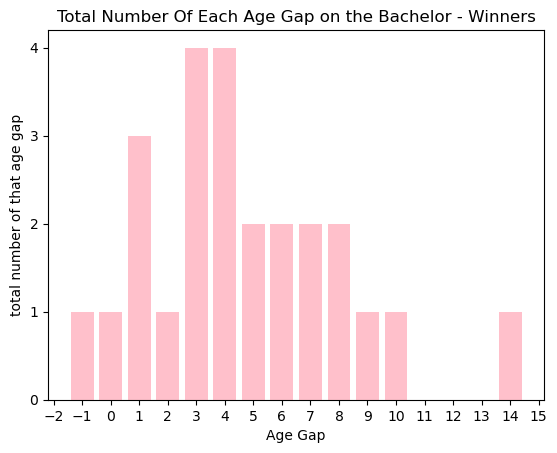

In [105]:
# used this website to help me set up the axis ranges:https://www.geeksforgeeks.org/how-to-set-axis-ranges-in-matplotlib/
import matplotlib.pyplot as plt
import numpy as np

plt.bar(count_of_bach_win_age_gap.keys(), count_of_bach_win_age_gap.values(), color="pink")
# asked chatgpt how I could arrange the x axis from -2 to 15 with an incrememnt of 1
plt.xticks(np.arange(-2, 16, 1))
plt.yticks(np.arange(0, 5, 1))
plt.xlabel('Age Gap')
plt.ylabel('total number of that age gap')
plt.title('Total Number Of Each Age Gap on the Bachelor - Winners')

plt.savefig('bach_age_gap_winners.jpeg', format='jpeg')
plt.show()

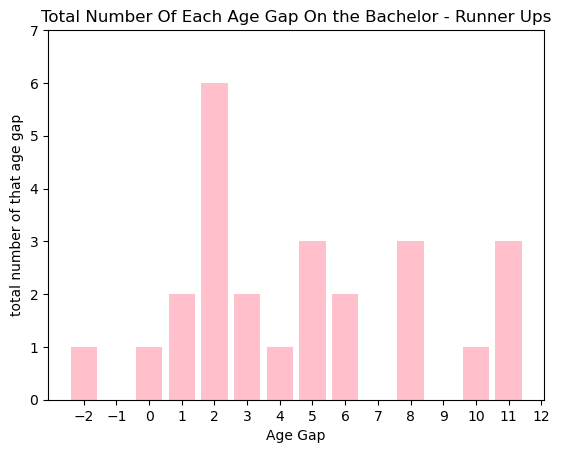

In [106]:
plt.bar(count_of_bach_runner_age_gap.keys(), count_of_bach_runner_age_gap.values(), color ="pink")
plt.xticks(np.arange(-2, 13, 1))
plt.yticks(np.arange(0, 8, 1))
plt.xlabel('Age Gap')
plt.ylabel('total number of that age gap')
plt.title('Total Number Of Each Age Gap On the Bachelor - Runner Ups')
plt.savefig('bach_age_gap_runnerups.jpeg', format='jpeg')
plt.show()

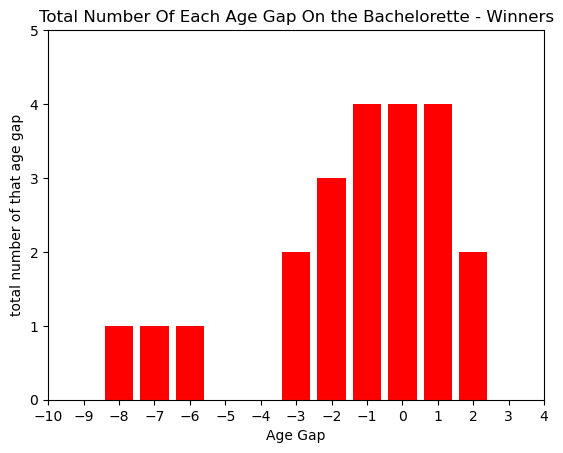

In [107]:
plt.bar(count_of_bachette_win_age_gap.keys(), count_of_bachette_win_age_gap.values(), color ="red")
plt.xticks(np.arange(-10, 5, 1))
plt.yticks(np.arange(0, 6, 1))
plt.xlabel('Age Gap')
plt.ylabel('total number of that age gap')
plt.title('Total Number Of Each Age Gap On the Bachelorette - Winners')
plt.savefig('bachette_age_gap_winners.jpeg', format='jpeg')
plt.show()

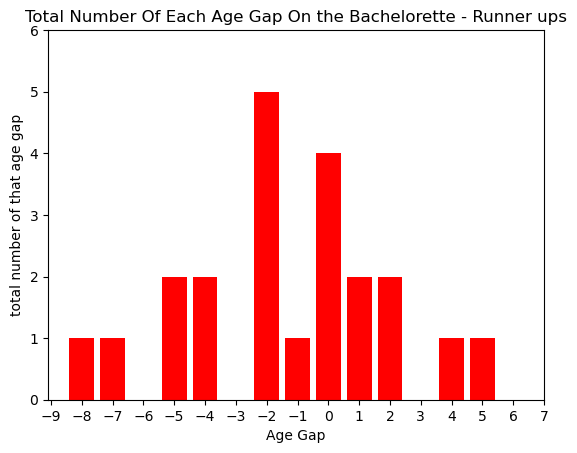

In [108]:
plt.bar(count_of_bachette_run_age_gap.keys(), count_of_bachette_run_age_gap.values(), color ="red")
plt.xticks(np.arange(-9, 8, 1))
plt.yticks(np.arange(0, 7, 1))
plt.xlabel('Age Gap')
plt.ylabel('total number of that age gap')
plt.title('Total Number Of Each Age Gap On the Bachelorette - Runner ups')
plt.savefig('bachette_age_gap_runnerups.jpeg', format='jpeg')
plt.show()

### Comparing Bachelor and Bachelorette data

Since I've found the percentage of age gaps for over and under 5 years for the winners and runner ups, I'm going to compare both sets of data for the Bachelor and Bachelorette to each other to see if there's patterns between both sets of data.

In [109]:
print("Bachelor Winner %: " + str(percent_five_age_gap_winner))
print("Bachelor runner up %: " + str(percent_five_age_gap_run))
print("Bachelorette Winner %: " + str(bachette_percent_five_age_gap_winner))
print("Bachelor runner up %: " + str(bachette_percent_five_age_gap_run))

Bachelor Winner %: {'five or less': 64.0, 'more than 5': 36.0}
Bachelor runner up %: {'five or less': 64.0, 'more than 5': 36.0}
Bachelorette Winner %: {'five or less': 86.4, 'more than 5': 13.6}
Bachelor runner up %: {'five or less': 90.9, 'more than 5': 9.1}


Above, shows the % for each type of contestant, winning or runner up, on their show, Bachelor or Bachelorette, with the percentages of age gaps of 5 years or under or above 5 years. 

With these percentages, I will be creating a multi bar chart to compare each groups % of age gaps for over or under 5 years. 

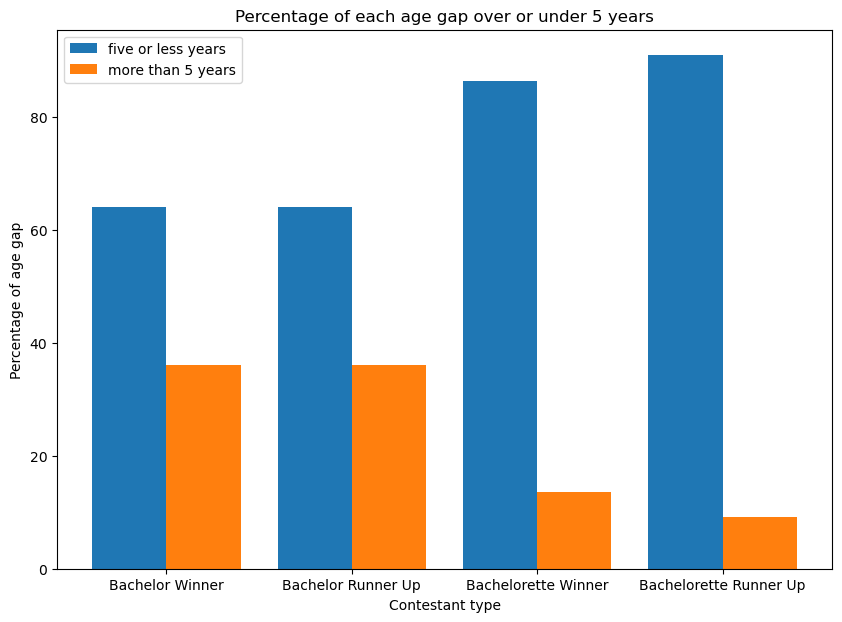

In [110]:
# used this website to help me plot my multi bar chart: https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
plt.subplots(figsize=(10,7))
X = ["Bachelor Winner", "Bachelor Runner Up", "Bachelorette Winner", "Bachelorette Runner Up"]

# the age gap % for all groups "five or less" year age gaps
five_or_less = [percent_five_age_gap_winner["five or less"],
         percent_five_age_gap_run["five or less"],
         bachette_percent_five_age_gap_winner["five or less"],
         bachette_percent_five_age_gap_run["five or less"]
         ] 
# the age gap for all % groups "more than 5" year age gaps
more_than_5 = [percent_five_age_gap_winner["more than 5"],
        percent_five_age_gap_run["more than 5"],
        bachette_percent_five_age_gap_winner["more than 5"],
        bachette_percent_five_age_gap_run["more than 5"]] 

X_axis = np.arange(len(X)) 
  
plt.bar(X_axis -0.2, five_or_less, 0.4, label = 'five or less years') 
plt.bar(X_axis + 0.2, more_than_5, 0.4, label = 'more than 5 years')
  
plt.xticks(X_axis, X) 
plt.xlabel("Contestant type") 
plt.ylabel("Percentage of age gap") 
plt.title("Percentage of each age gap over or under 5 years") 
plt.legend() 
plt.savefig('comparing_Age_gap_%.jpeg', format='jpeg')
plt.show()

## Findings (findings)

Based on the results from my project, I found two interesting patterns in the data. 

The first being that in the bachelor rarely any winners or runner ups were older than the male lead. For the winners, in the 25 seasons I observed, only 1 women who won was the same age and 1 was a year older than the bachelor while the 23 other winners were younger than the male lead. Similarly, out of the 25 runner ups, 1 woman was 2 years older and one was the same age as the lead while the other 23 were younger as well. This suggests that the males prefer for a woman to be younger than them.

The woman leads however, chose male runner ups and winners who were both older or younger than them. For the winning males, 12 were older than the woman while 10 were either the same age or younger than the woman. For the runner ups, 12 males were older while 10 were younger than the woman. Because this is about 50/50 for both winners and runner ups it doesn't suggest that woman tend have a strong preference for men being younger or older than them. 

My second finding is that people with an age gap of 5 years or less won more often than people with an age gap of more than 5 years. In the Bachelor, 64% of the winners had an age gap of less than 5 years while only 36% had an age gap of more than 5 years. Additionally, Bachelor runner ups shared the same percentage where 64% had an age gap of 64% and 36% were 5+ years older. Bachelorette winners and runner ups had the highest percentage of winners where the bachelorette winners had a smaller age gap percentage at 86.4% where only 13.4% were 5+ years older. The Bachelorette runner ups had a percentage of 90.9% of them having a 5 year or less age difference and only 9.1% having a larger than 5 year age gap. This shows that more people had won and/or made it to the finale with a smaller age gap, suggesting that having a smaller age gap makes you more likely to win the show.


## Discussion (reflection on process)

#### Limitations:
Some limitations in my project include: limited dataset, focusing on one variable, and the fact that relationships are complicated. 

Because the Bachelor is only 28 seasons and the Bachelorette is 21 seasons, I already had a smaller dataset since there was only ~50 seasons to go through. Additionally, I chose to only focus on leads, winners and runner ups narrowing my dataset to 3 people per season, having about 150 people total in the dataset.

Another potential limitation is that this project only focused on one potential variable when selecting a winner on the show: age. However, relationships are complicated and there are many factors that likely go into picking a partner. While my results show that the majority of age gaps between leads and contestants were 5 years or less suggesting a closer age gap may have been a factor in people making it far into the finale, its important to note that age is most likely not the only considering factor for the lead when choosing who they wanted to propose to. There are other potential factors such as personality or shared values/belief systems which may have had a factor in the decision, but they are too complex to measure in this project.

#### Implications:
This project could be a stepping stone to future research which could look into more than one factor for contestants winning the bachelor/bachelorette. Results from this project could also be used by the producers when making casting desisions for the two reality shows and this could influence how both the leads and contstants are chosen.

Looking back, when I first started this project I thought comparing the age gaps of just the finalists (runner ups and winners) would be sufficient in determining if age gap had an impact on who made it to the finale. While I still think my dataset showed me patterns that age may matter in the show, I think my project would have been stronger if I included data from other contestants who didn't make it as far. If I were to go back and/or continue working on this in the future, I would include data from constestants who didn't make it to the finale and compare that to the ones who did as I feel that could strengthen my data results. 

## Conclusion

The goal of my project was to see if age had any impact on who was making it to the finale and winning the Bachelor/Bachelorette. I looked at the age gaps between the leads and contestants and found the % of every age gap between a group (bach winner, bach runner up, bachette winner, bachette runner up) as well as the percentages for the groups for the age gaps under 5 years and above 5 years. Based on the reuslts, it seems as though age may have an impact on contestants making it to the finale, and that people closer in age to the lead may have a higher chance of winning compared to someone with a larger age gap. Despite these results, further research would need to be done to determine if that is the most signifcant factor for leads choosing a winner. 

## References

Links to Past Research:
https://people.com/
tv/bachelor-stats-age-name-occupation/, 
https://fivethirtyeight.com/features/the-bachelorette/ 

Website where data was collected:
https://bachelor-nation.fandom.com/wiki/The_Bachelor
https://bachelor-nation.fandom.com/wiki/The_Bachelorette

Websites I used to help with the code:
https://www.geeksforgeeks.org/how-to-set-axis-ranges-in-matplotlib/
https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
https://www.geeksforgeeks.org/python-counter-objects-elements/
https://stackoverflow.com/questions/4880960/how-to-sum-all-the-values-in-adictionary#:~:text=USE%20sum()%20TO%20SUM,values%20from%20the%20previous%20step.